### K-means clustering

In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#criando o DataFrame "df_chem" (e talvez outros DataFrames)
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,6,135,136,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
#df_chem, dados_categoricos

In [3]:
nome = 'df_chem'
atributos = ["Specific Gravity", "Mohs Hardness", "Dispersion", 'Molar Mass', 'Molar Volume', 'Calculated Density']
#target = ["Refractive Index"]
df_chem_r = df_chem.reindex(atributos, axis=1)


### Normalização do Dataset

In [24]:
sc = StandardScaler()
sc.fit(df_chem_r)
df_chem_r_norma = sc.transform(df_chem_r)

### Fit K-Means

In [25]:
n_clusters=3  #Define três clusters

k_means = KMeans(            #Inicializando o K-Means
    n_clusters=n_clusters,  #Definindo número de clusters
    init='random',          #Inicialização randomica, aqui você pode tentar o K-Means++ :)
    n_init=10,              #Número de inicializações
    max_iter=300,           #Número máximo de iterações
    tol=1e-04,              #Tolerância para variação da coordenada dos centróides para definir a convergência
    random_state=0          #Define a semente aleatória
)

y_k_means = k_means.fit_predict(df_chem_r_norma) #Fita o K-Means

### Plot K-Means

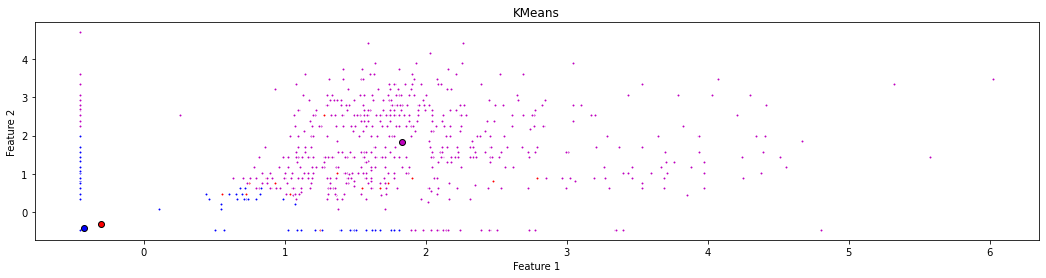

In [26]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

centroids = kmeans.cluster_centers_ #Extraindo os centróides do K-Means
labels = pairwise_distances_argmin(df_chem_r_norma, centroids) #Usando a função pairwise_distances_argmin 
                                                      #para dar os labels aos clusters
colors = ["r", "m", "b", "y", "k"] #Definindo a paleta de cores

fig = plt.figure(figsize=(18, 4)) #Definindo a figura e seu tamanho
ax = fig.add_subplot()             #Criando um subplot

for k, col in zip(range(n_clusters), colors): #Desempacotando a lista de número de cluster e cores.
    my_members = labels == k  #Define quais pontos são membros de cada cluster
    #print(my_members)        #Descomente essa linha para entender como se comporta a variável my_members
    cluster_center = centroids[k] #Pega as coordenadas do centróide k
    ax.plot(                      #Plota os pontos do centróide k
        df_chem_r_norma[my_members, 0],    #Coordenada do eixo-x
        df_chem_r_norma[my_members, 1],    #Coordenada do eixo-y
        markerfacecolor=col,      #Define a cor do ponto
        marker=".",               #Define o estilo do ponto
        markeredgecolor="w",      #Define a cor de contorno do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )
    ax.plot(                      #Plotando os centróides
        cluster_center[0],        #Coordenada x do centróide
        cluster_center[1],        #Coordenada y do centróide
        marker="o",               #Define estilo do ponto
        markerfacecolor=col,      #Define cor do ponto
        markeredgecolor="k",      #Define a cor do contorno do ponto
        markersize=6,             #Define o tamanho do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )

ax.set_title("KMeans")  #Título do gráfico
plt.xlabel('Feature 1') #Nome da componente x
plt.ylabel('Feature 2') #Nome da componente y

plt.show() #Mostrar o gráfico

### PCA DataFrame

In [30]:
pca = PCA()
pca.fit(df_chem_r_norma)
df_chem_r_pca = pca.transform(df_chem_r_norma)

### Coloração Refractive Index

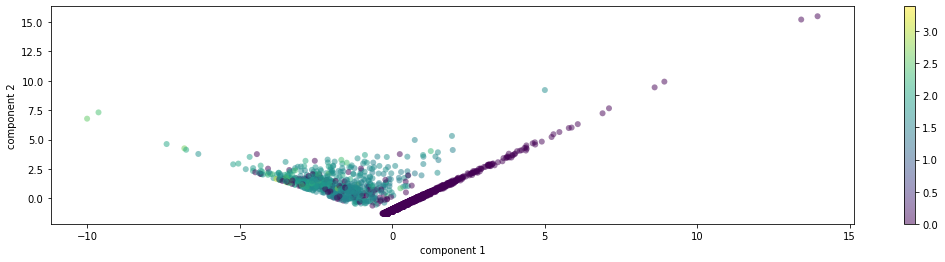

In [32]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(df_chem_r_pca[:, 0], df_chem_r_pca[:, 1], edgecolor='none', alpha=0.5, c=df["Refractive Index"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()